### SMA Crossing
download data -> construct_signals (short/long_ma) -> simluate (trading strategy) -> plot1 for signal -> plot2 for PnL

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import pandas as pd

class MovingAverageCrossover:

    def __init__(self, capital, stock, start, end, short_period, long_period):
        self.data = None
        self.is_long = False
        self.short_period = short_period
        self.long_period = long_period
        self.capital = capital
        self.equity = [capital]
        self.stock = stock
        self.start = start
        self.end = end

    def download_data(self):
        stock_data = {}
        ticker = yf.download(self.stock, self.start, self.end)
        stock_data['price'] = ticker['Adj Close']
        self.data = pd.DataFrame(stock_data)

    def construct_signals_rolling(self):
        self.data['short_ma'] = self.data['price'].rolling(window=self.short_period).mean()
        self.data['long_ma'] = self.data['price'].rolling(window=self.long_period).mean()

    #Exponential weighted: weighting(impact) on stock prices are decrease exponentially, 
    #with the recent ones are more important 
    #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html
    def construct_signals_ewm(self):
        self.data['short_ma'] = self.data['price'].ewm(span=self.short_period).mean()
        self.data['long_ma'] = self.data['price'].ewm(span=self.long_period).mean()
        
    def simulate(self):
        # we consider all the trading days and decide whether to open a
        # long position or not
        price_when_buy = 0

        for index, row in self.data.iterrows():
            # CLOSE THE LONG POSITION WE HAVE OPENED
            if row['short_ma'] < row['long_ma'] and self.is_long:
                self.equity.append(self.capital * row.price / price_when_buy)
                self.is_long = False
            elif row['short_ma'] > row['long_ma'] and not self.is_long:
                # OPEN A LONG POSITION
                price_when_buy = row['price']
                self.is_long = True

    def plot_signals(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.data.price, label='Stock Price')
        plt.plot(self.data.short_ma, label='Short MA', color='blue')
        plt.plot(self.data.long_ma, label='Long MA', color='green')
        plt.title('Moving Average (MA) Crossover Trading Strategy')
        plt.xlabel('Date')
        plt.ylabel('Stock Price')
        plt.show()

    def plot_equity(self):
        print("Profit of the trading strategy: %.2f%%" % (
                    (float(self.equity[-1]) - float(self.equity[0])) /
                    float(self.equity[0]) * 100))
        print("Actual capital: $%0.2f" % self.equity[-1])
        plt.figure(figsize=(12, 6))
        plt.title('Equity Curve')
        plt.plot(self.equity, label='Stock Price', color='green')
        plt.xlabel('Date')
        plt.ylabel('Actual Capital ($)')
        plt.show()

[*********************100%***********************]  1 of 1 completed


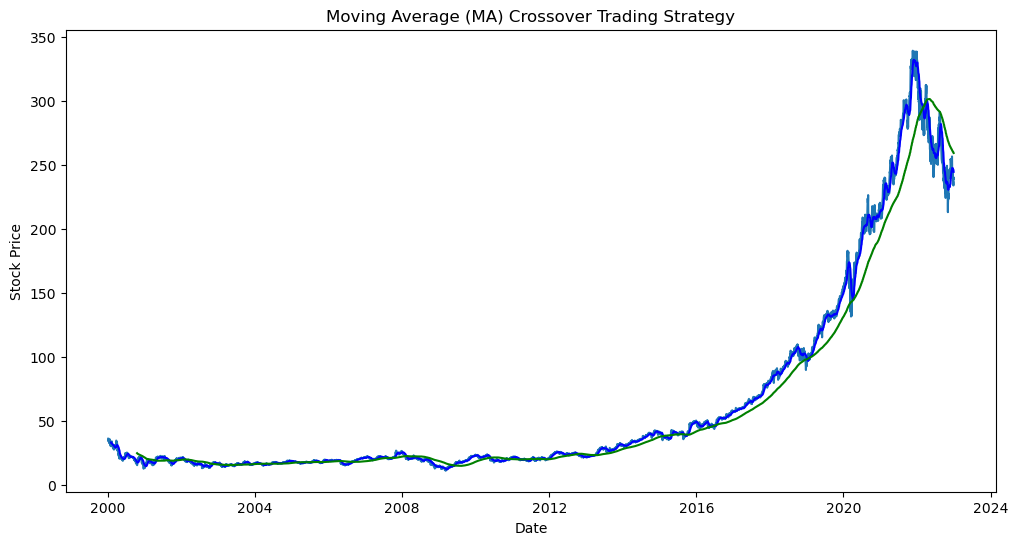

Profit of the trading strategy: 193.64%
Actual capital: $293.64


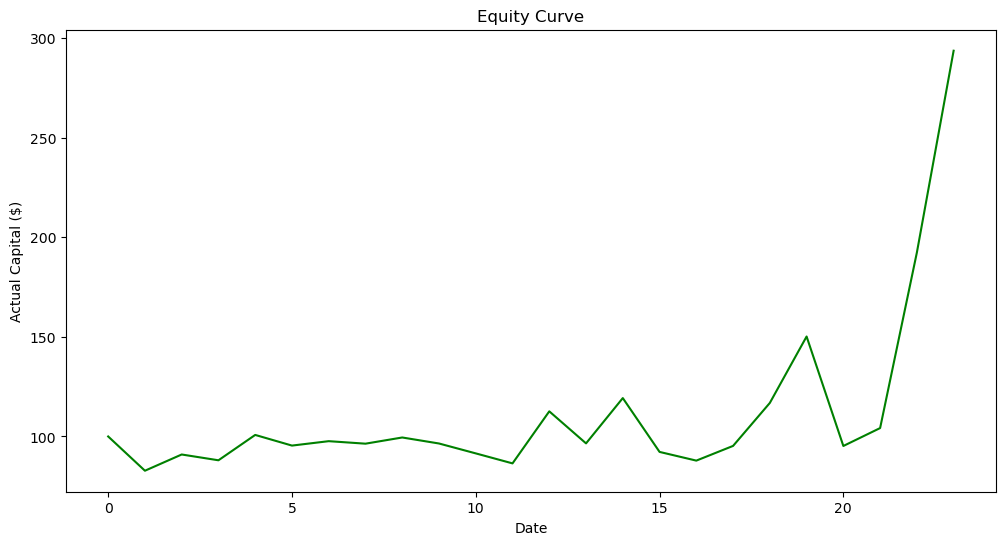

In [2]:
if __name__ == '__main__':

    start_date = datetime.datetime(2000, 1, 1)
    end_date = datetime.datetime(2023, 1, 1)

    strategy = MovingAverageCrossover(100, 'MSFT', start_date, end_date, 20, 200)
    strategy.download_data()
    strategy.construct_signals_rolling()
    strategy.plot_signals()
    strategy.simulate()
    strategy.plot_equity()

[*********************100%***********************]  1 of 1 completed


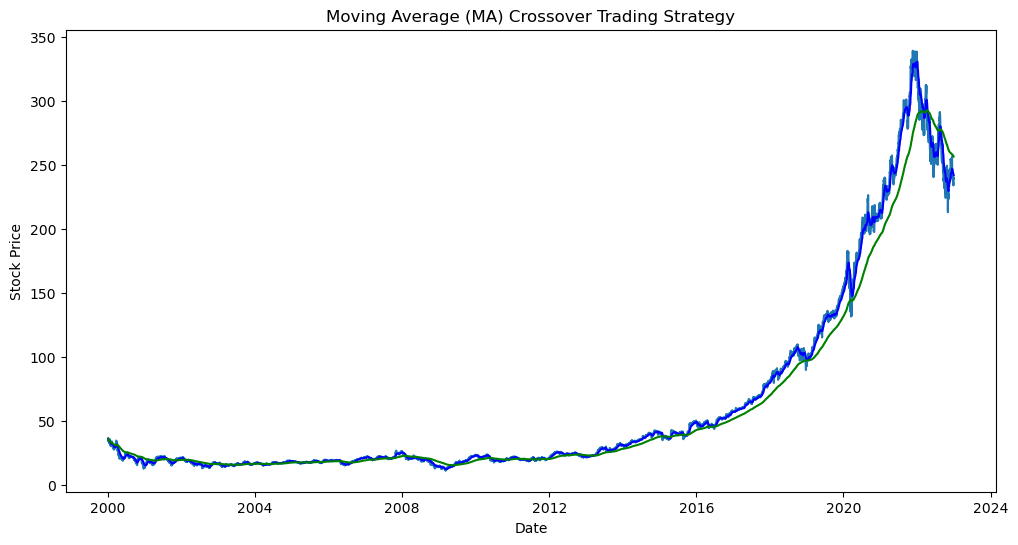

Profit of the trading strategy: -9.20%
Actual capital: $90.80


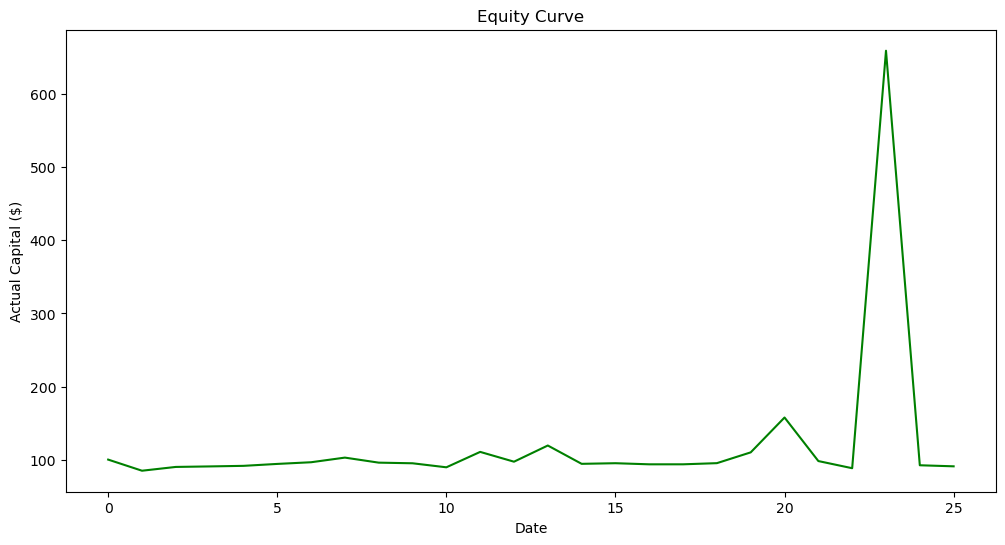

In [3]:
if __name__ == '__main__':

    start_date = datetime.datetime(2000, 1, 1)
    end_date = datetime.datetime(2023, 1, 1)

    strategy = MovingAverageCrossover(100, 'MSFT', start_date, end_date, 20, 200)
    strategy.download_data()
    strategy.construct_signals_ewm()
    strategy.plot_signals()
    strategy.simulate()
    strategy.plot_equity()